# Linear Regression!

Thursday, June 15 2023

Notebook Author: Susanna Lange, PhD

We have talked about

 - Different associations between variables
 
 - A method of statistical inference (hypothesis testing)
 
 
 
# Goals

 - Continue discussion of variable associations
 
 - A method to help describe (and predict) such a relationship
         
      - Linear Regression

We have large amounts of data.

 - Some of the data fields have relationships.
 
 
- Some of these relationships are important...and some are meaningless.


- The first step in sorting these out is measuring how strong the relationships are.


We focus on **linear association**.

In particular


 - 2 variables of interest
    
     - Explanatory (independent) variable: the variable that explains, or influences a trend in the response variable. This is the x-variable.
     
     - Response (dependent) variable: the measured outcome. Responds to trends in the explanatory variable. This is the y-variable
     
Interested in a possible relationship between them! How do we begin to find such a relationship? Through visualizations....scatterplots.

Eventual goal: To predict the outcome given new observations.

### Possible Scatterplots


Two measures:

 - Strength of association 
 
 - Direction of association

<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/corr_part0.png?raw=true" width="800">

Described in terms of ...

## Correlation: Correlation Coefficient, r


- **Correlation r** is a numerical measure of the <font color=red>direction</font> and <font color=red>strength</font> of the <font color=red>linear</font> relationship between two numerical variables.

- r always lies between -1 and 1; the strength increases as you move away from 0 to either -1 or 1.

    - $r > 0$: positive association
      
    - $r < 0$: negative association
       
    - $r \approx 0$: very weak linear relationship
    - close to 1 or -1: strong linear relationship
    - $r=-1$ or $r=1$: *only* when all the data points on the scatterplot lie exactly along a *straight line*


## How does a change in $x$ affect change in $y$?


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/corr_part2.png?raw=true" width="800">


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/corr_r.png?raw=true" width="800">
Note: Images taken from SkewtheScript

### Recall we do have to be careful! Correlation is not Causation!


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/linear_corr.png?raw=true" width="800">

Let's consider data!

## Remember the Galton height data?

- [Sir Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton) was an eminent 19th century scientist, and among the first to use measures of dependence
- Rediscovered the concept of correlation (1888) and used it to study heredity, anthropology and psychology.
- Sir Francis Galton collected data from more than 900 children recording, among other things, their (adult) heights and the heights of their parents.


Includes a variable midparent height - average of the heights of the two parents.



There are two questions we would like to ask:

1. How strong is the dependence/association between children and parent heights?

2. How might we use this to predict another data point (within x bounds)?

In [1]:
#import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
galton_df = pd.read_csv("../datasets/galton.csv")
galton_df.head(6)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
5,2,75.5,66.5,73.66,4,2,male,72.5


In [3]:
len(galton_df) # number of rows

934

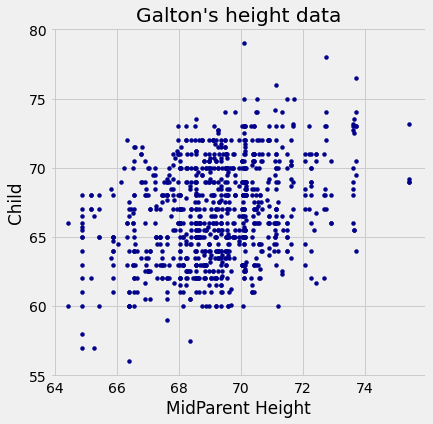

In [5]:
# first row - sets figure size; 's=15' sets the size of the points
plt.figure(figsize=(6,6))
plt.scatter(galton_df['midparentHeight'], galton_df['childHeight'],c="darkblue",s=15)
plt.xlabel("MidParent Height")
plt.ylabel("Child")
plt.title("Galton's height data")
plt.show()

Visually, there does appear to be a positive linear relationship!

We can find the correlation coefficient in python with the code:

```python 
x.corr(y)
```
or 
```python 
y.corr(x)
```
where x and y are Series.

In [6]:
# Correlation Coefficient: Pearson's r

print(galton_df['midparentHeight'].corr(galton_df['childHeight']))                    

print(galton_df['childHeight'].corr(galton_df['midparentHeight']))


0.32094989606395924
0.3209498960639593


## It is important to visualize your data

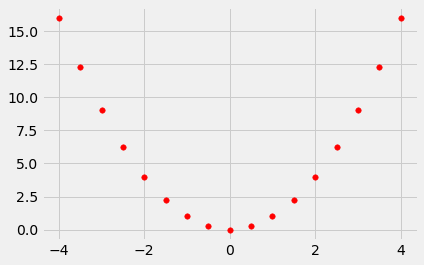

In [8]:
new_x = np.arange(-4, 4.1, 0.5)
y = new_x**2
plt.scatter(new_x, y, s=30, color='r');

In [9]:
pd.Series(new_x).corr(pd.Series(y))

0.0

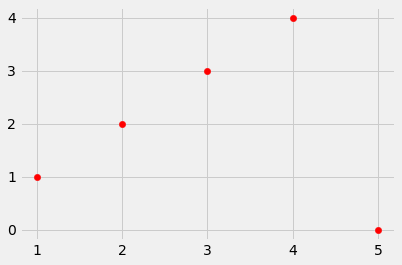

In [11]:
# the impact of outliers
x=np.array([1, 2, 3, 4, 5])
y=np.array([1, 2, 3, 4, 0])
plt.scatter(x, y, s=40, color='r');

In [12]:
pd.Series(x).corr(pd.Series(y))

0.0

### Back to height data

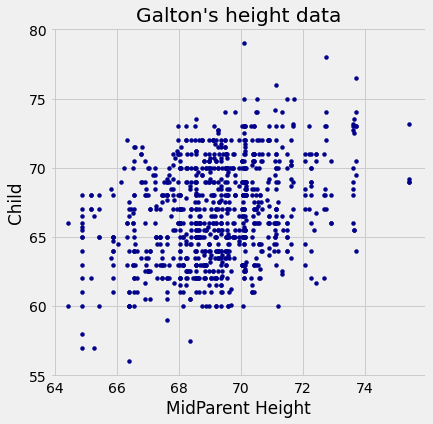

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(galton_df['midparentHeight'],galton_df['childHeight'],c="darkblue",s=15)
plt.xlabel("MidParent Height")
plt.ylabel("Child")
plt.title("Galton's height data")
plt.show()

Suppose we have a **new** midparent height value of 72. How might we predict the child's height?

We want to create a line to fit the data! Then we can use that line to predict.

<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/best_fit_line.png?raw=true" width="800">


How do we choose the best line?!


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/best_line.png?raw=true" width="800">

### Residuals

We consider the residuals:
    For every data point $(x_i, y_i)$, the residual is $$e_i = y_i - \hat{y_i}$$
   
   
In words, this is the difference between the observed data output and the predicted output.


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/residual.png?raw=true" width="800">


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/residual_ex.png?raw=true" width="800">

We might think it is enough to consider the sum of the residuals and try to minimize this!


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/line_sum0.png?raw=true" width="800">


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/line_sum2.png?raw=true" width="800">

Instead, we can minimize the sum of the squared residuals!

<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/squared_res.png?raw=true" width="800">

Image credit: SkewtheScript

This is the **least square method**

We are minimizing

$$e_1^2+e_2^2+...+e_n^2 = \sum_i e_i^2= \sum_i(y_i - \hat{y_i})$$


Recall the equation of a line: $$y=mx+b$$

Each $\hat{y_i}$ is on the line $\hat{y_i} = a+bx_i$...

so we want to find $a$ and $b$ such that this sum is the smallest $$\sum_i(y_i - (a+bx_i))$$


That is, we want to minimize this, where

$b$ is the slope

$a$ is the $y$-intercept

If you're curious...if can be shown (through Calculus) that 

$$b = \frac{\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n(x_i - \bar{x})^2}$$

and


$$a = \bar{y} - b\bar{x}$$

where $\bar{x}$ and $\bar{y}$ are the average over the data points $\{(x_i, y_i)\}_{i=1}^n$

Remember the correlation coefficient, $r$?! It comes from the sum of squared errors!

**Intuition behind the correlation coefficient**


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/sse_ssto.png?raw=true" width="800">

$$r^2 = 1-\frac{RSS}{TSS} = \frac{TSS-RSS}{TSS}$$

where RSS= sum of squared errors (or residual sum of squares) = $\sum_i(y_i - \hat{y_i})^2$


TSS = total sum of squares = $\sum_i(y_i - \bar{y})^2$

A measure of how 'good' the regression line (minimizing RSS) is to compare it against how much the error improved over TSS.

Example if $TSS = 100 $ and $RSS = 2$ then  $$\frac{TSS-RSS}{TSS} = \frac{98}{100} \approx 1$$

(hence $r \approx 1$ )

$TSS = 100 $ and $RSS = 90$ then  $$\frac{TSS-RSS}{TSS} = \frac{10}{100} = 1/10$$

(hence $r \approx 0$) 

Note: Recall the least square line makes the sum of squared residuals the SMALLEST!!! Every other line has larger residuals. A measure to compare is to consider the specific line that ignores the $x$ values altogether - the average line.

How does the inclusion of the $x$ variable improve the error?

### **How can we do this in python?!**

We do need another library. The sklearn library.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

To feed the data to the model we need the format:

```python
model.fit(numpy_array_x, numpy_array_y)

```
where numpy_array_x is a 2 dimensional array and numpy_array_y is a 1-D array

In [16]:
model.fit(galton_df['midparentHeight'].to_numpy().reshape((-1, 1)), galton_df['childHeight'].to_numpy())

LinearRegression()

In [17]:
#We can get the following: r^2 value, y-intercept, slope of the linear regression line

r_sq = model.score(galton_df['midparentHeight'].to_numpy().reshape((-1, 1)), galton_df['childHeight'].to_numpy())

print("coefficient of determination", r_sq)

print("intercept:", model.intercept_)


print("slope", model.coef_)

coefficient of determination 0.1030088357834662
intercept: 22.636240549589786
slope [0.6373609]


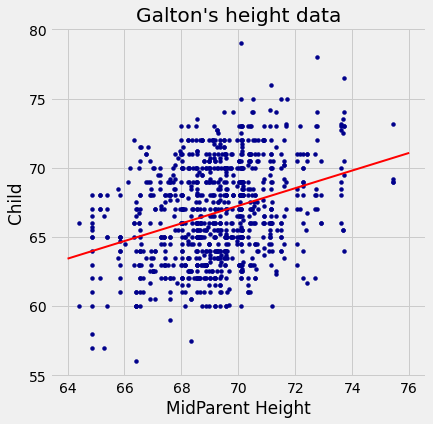

In [18]:
#back to our data
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(galton_df['midparentHeight'],galton_df['childHeight'],c="darkblue",s=15)
plt.xlabel("MidParent Height")
plt.ylabel("Child")
xlims = np.array([64, 76])
plt.plot(xlims, 0.63736 * xlims + 22.636, lw=2,color='red')
plt.title("Galton's height data")
plt.show()

To predict using our linear regression model: Predict the child's height with a midparent height of 72:

Using the python model:

In [19]:
model.predict(np.array([72]).reshape((-1, 1))) #input into  model.predict must be a 2D array

array([68.52622513])

In [20]:
#using the line we created! y = 0.63736x+22.636

y_pred = 0.63736 * 72 + 22.636
y_pred

68.52592

## How do we know linear regression is a good option for our data?!

Visualize the residuals in a plot

 - residuals on y-axis
 - x-values on x-axis
 
 
The outcome of this graph can help us determine if linear regression is a good option.

Add "Residuals" column to the dataframe.

In [21]:
def computes_residuals(row):
    ''' computes the resiudal for childHeight and midparentHeight '''
    return row['childHeight'] - (model.coef_[0]*row['midparentHeight'] + model.intercept_)


galton_df['Residuals'] = galton_df.apply(computes_residuals, axis=1)

In [22]:
galton_df

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,Residuals
0,1,78.5,67.0,75.43,4,1,male,73.2,2.487627
1,1,78.5,67.0,75.43,4,2,female,69.2,-1.512373
2,1,78.5,67.0,75.43,4,3,female,69.0,-1.712373
3,1,78.5,67.0,75.43,4,4,female,69.0,-1.712373
4,2,75.5,66.5,73.66,4,1,male,73.5,3.915756
...,...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0,-1.109971
930,203,62.0,66.0,66.64,3,2,female,62.0,-3.109971
931,203,62.0,66.0,66.64,3,3,female,61.0,-4.109971
932,204,62.5,63.0,65.27,2,1,male,66.5,2.263214


In [23]:
# plot a scatterplot of residuals against midparentHeight

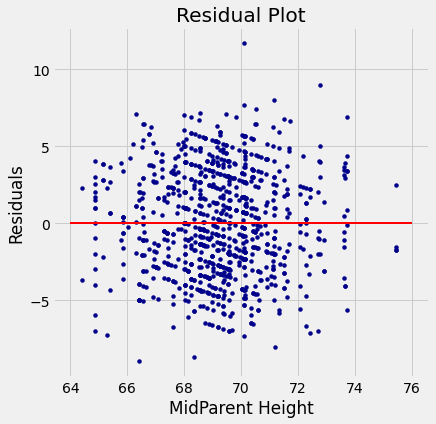

In [25]:
import numpy as np
plt.figure(figsize=(6,6))
plt.scatter(galton_df['midparentHeight'],galton_df['Residuals'],c="darkblue",s=15)
plt.xlabel("MidParent Height")
plt.ylabel("Residuals")
xlims = np.array([64, 76])
plt.plot(xlims, 0 * xlims, lw=2,color='red') 
plt.title("Residual Plot")
plt.show()

**Talk to your neighbor: What is happening here?**

This residual plot indicates that linear regression was a reasonable method of estimation!

What does a poor residual plot look like?

 - uneven variation about the horizontal line at 0
 
 - non random pattern


<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/residual_plot_example.png?raw=true" width="800">

Recall this relationship between $x$ and $y$


$y=x^2$

What does the residual plot look like for this clearly non-linear plot?!

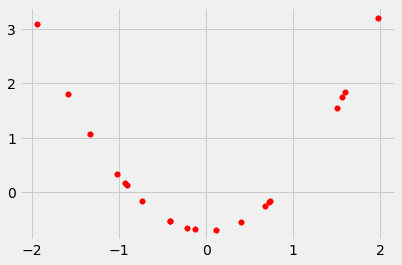

In [26]:
new_x = np.random.uniform(-2,2,20)

y = (new_x)**2 + np.random.uniform(-2,2)
plt.scatter(new_x, y, s=30, color='r');

### <mark style="background-color: Thistle">Find the linear regression line for this data: (Note we do not expect good results) </mark>


In [ ]:
model2 = LinearRegression() 

#one line of code here

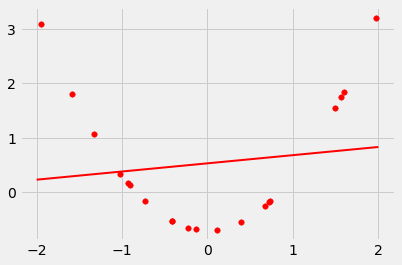

In [30]:
#plot the graph
xlims = np.array([-2, 2])
plt.scatter(new_x, y, s=30, color='r');
plt.plot(xlims, model2.coef_[0]*xlims + model2.intercept_, lw=2,color='red')
plt.show()

The residual plot looks like:

Text(0, 0.5, 'Residuals')

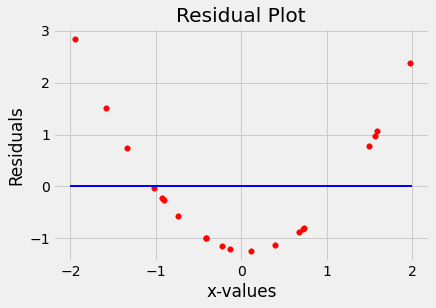

In [31]:
residual_array = y - (model2.coef_[0]*new_x + model2.intercept_)
xlims = np.array([-2, 2])
plt.plot(xlims, 0 * xlims, lw=2,color='blue')
plt.scatter(new_x, residual_array, s=30, color='r');
plt.title('Residual Plot')
plt.xlabel('x-values')
plt.ylabel('Residuals')
plt.show()

So ...what does a poor residual plot look like?

 - uneven variation about the horizontal line at 0
 
 - non random pattern

### Extrapolation: using your model to make predictions outside the range of your data

 - Can be dangerous because the trends may not continue



<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/extrapolation.png?raw=true" width="800">



<img src="
https://github.com/SusannaLange/Data_118_images/blob/main/DSSI_images/linear_regression/extrap_2.png?raw=true" width="800">

Both comics: xkcd

#### Goal of Regression:
    
To predict what happens if we include another data point or points! (within original $x$ bounds.)

### <mark style="background-color: Thistle">Linear Regression Activity! </mark>

Below is a housing dataset that contains information on year built, number of rooms, number of beds, etc. Make a few scatterplots comparing 'sold price' with differnt variables to find a potential association between the two. 

**The question to answer: what variables should we use if we want to predict selling price for a house?**

Find the least squares regression line for your chosen variables.

Determine if linear regression was a good option for your variables of interest.

In [ ]:
housing_df=pd.read_csv("../datasets/Housing.csv")
housing_df.head()